In [3]:
# --- built in ---
import os
import sys
import time
import math
import logging
import functools
import matplotlib.pyplot as plt

# --- 3rd party ---
import numpy as np
import torch
from torch import nn
import random

# --- owner's ---
import utils as utl
from model import Energy, ToyMLP
import train as trn

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

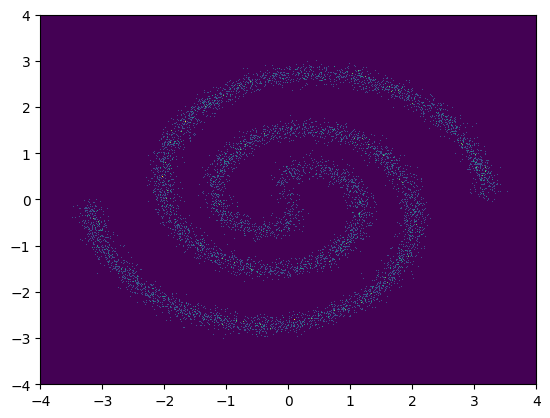

In [11]:
# show distribution
train_dataset = utl.sample_2d('2spirals',10000)
rng = [[-4, 4], [-4, 4]]
plt.hist2d(train_dataset[:,0].numpy(), train_dataset[:, 1].numpy(), range=rng, bins=500, cmap=plt.cm.viridis)
plt.title('Distribution being modelled')
plt.show()

In [52]:
# Train model
train_dataset = train_dataset[torch.randperm(train_dataset.size(0))]
model = Energy(
    net = ToyMLP()
)
trainer = trn.Trainer(
    model,
    trained=True,
    learning_rate = 1e-3,
    n_slices = 1,
    loss_type='ebm',
    batch_size=100,
    percent_model_sample=0.95,
    alpha=0.001
).learn(
    train_dataset = train_dataset,
    n_epochs = 1,
    batch_size = 100
)
# save model
trainer.model.save('ebm')

epoch:1, loss =  -0.15948981


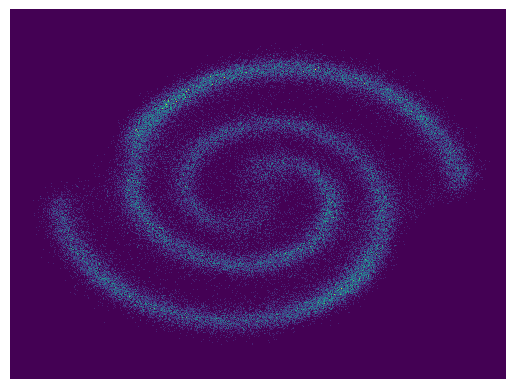

In [12]:
ini_samples = torch.rand(100000, 2) * 6 - 3
model = Energy(
        net = ToyMLP()
    )
model.load('ebm')
samples = utl.langevin_dynamics(
        lambda x: model.score(x),
        ini_samples,
        eps=0.01,
        n_steps=100
    ).detach().cpu().numpy()
rng = [[-4, 4], [-4, 4]]
plt.hist2d(samples[:,0], samples[:, 1], range=rng, bins=500, cmap=plt.cm.viridis)
plt.axis(False)
plt.show()


(-0.5, 999.5, 999.5, -0.5)

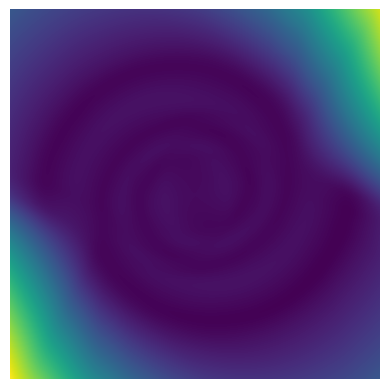

In [13]:
model = Energy(
        net = ToyMLP()
    )
model.load('ebm')
out = utl.sample_energy_field(
    model,
    range_lim=4,
    grid_size=1000,
    device='cpu'
)
plt.imshow(out)
plt.axis(False)

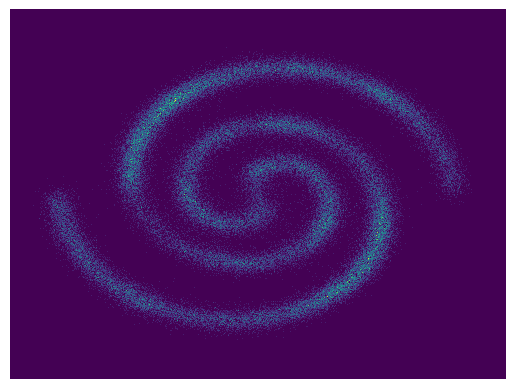

In [14]:
ini_samples = torch.rand(100000, 2) * 6 - 3
model = Energy(
        net = ToyMLP()
    )
model.load('ssm_vr')
samples = utl.langevin_dynamics(
        lambda x: model.score(x),
        ini_samples,
        eps=0.01,
        n_steps=100
    ).detach().cpu().numpy()
rng = [[-4, 4], [-4, 4]]
plt.hist2d(samples[:,0], samples[:, 1], range=rng, bins=500, cmap=plt.cm.viridis)
plt.axis(False)
plt.show()


(-0.5, 999.5, 999.5, -0.5)

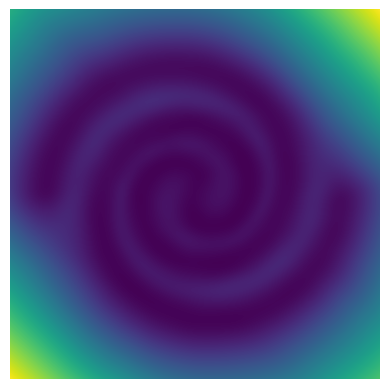

In [15]:
model = Energy(
        net = ToyMLP()
    )
model.load('ssm_vr')
out = utl.sample_energy_field(
    model,
    range_lim=4,
    grid_size=1000,
    device='cpu'
)
plt.imshow(out)
plt.axis(False)